In [28]:
import numpy as np
import cv2
import pandas as pd
import sys
import os
import keras
from keras.layers import Input, Dense 
from keras.layers import BatchNormalization, Dropout, Flatten, Reshape, Lambda
from keras.layers import concatenate
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.layers.advanced_activations import LeakyReLU
from keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
dirs = ['4a','4b','4c','4d', '4e','4f','5a','6a','6b','6c','6d','6e','6f','7a','30','31','32', '33',
       '34', '35', '36', '37', '38', '39', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50',
       '51', '52', '53','54','55', '56','57','58','59','61','62','63','64','65','66','67','68','69','70',
       '71','72','73','74','75','76','77','78','79']
classes = ['J','K','L', 'M', 'N','O','Z','j','k','l','m','n','o','z','0','1', '2', '3',
          '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'P',
          'Q', 'R', 'S','T','U', 'V','W','X','Y','a','b','c','d','e','f','g','h','i','p',
          'q','r','s','t','u','v','w','x','y']

In [3]:
supdirs = list(set(['hsf_{}'.format(i) for i in range(8)]) - set(['hsf_5']))

In [4]:
classes_dirs_tuple = {
    c: ['data/by_class/' + d + '/' + s + '/' for s in supdirs] + 
    ['data/by_class/' + d + '/train_' + d + '/']
    for c, d in zip(classes, dirs)
}

In [58]:
#classes_dirs_tuple

In [5]:
def flatten_list(lst):
    res = []
    for l in lst:
        for e in l:
            res.append(e)
    return res

In [6]:
classes_imgs_tuple = {
    c: flatten_list([[d + img_name for img_name in os.listdir(d)] for d in drs_list])
    for c, drs_list in classes_dirs_tuple.items()
}

In [7]:
len(classes_imgs_tuple['J'])

8350

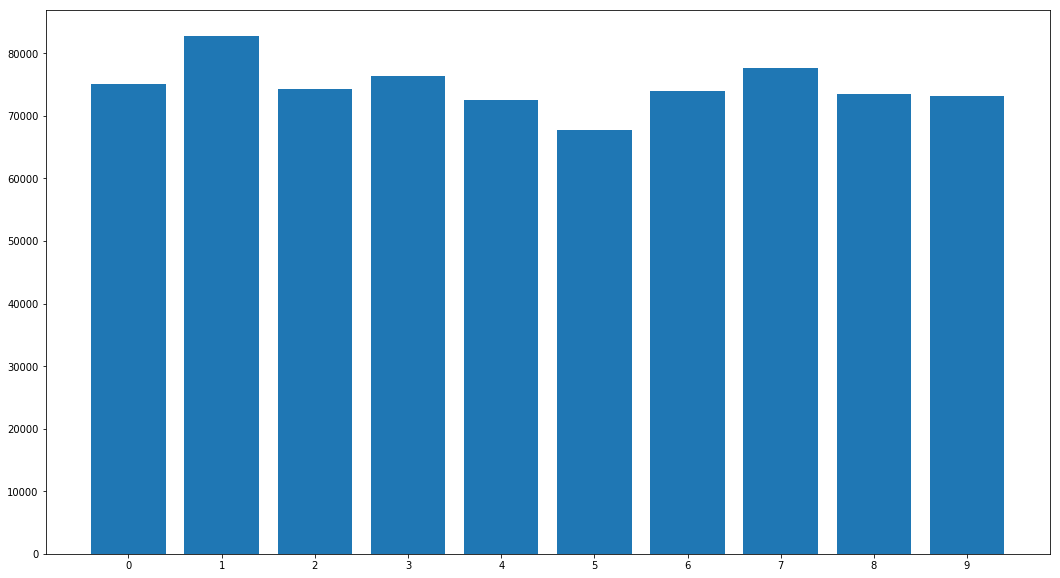

In [8]:
plt.figure(figsize=(18, 10))
plt.bar([c for c, _ in classes_imgs_tuple.items()], [len(d) for _, d in classes_imgs_tuple.items()],
       align = 'center')
plt.show()

In [23]:
label_img_store = [(label, img) for label in classes for img in classes_imgs_tuple[label]]
len(label_img_store)

1545923

In [29]:
class CsvFileWriter:
    def __init__(self, fpath, *fields):
        file_exists = os.path.isfile(fpath)

        self.file = open(fpath, 'a', newline='')
        self.writer = csv.DictWriter(self.file, fieldnames=fields)
        if not file_exists:
            self.writer.writeheader()

    def append(self, **kwargs):
        self.writer.writerow(kwargs)

    def close(self):
        self.file.close()